In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/AQI and Lat Long of Countries.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16695 entries, 0 to 16694
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             16393 non-null  object 
 1   City                16695 non-null  object 
 2   AQI Value           16695 non-null  int64  
 3   AQI Category        16695 non-null  object 
 4   CO AQI Value        16695 non-null  int64  
 5   CO AQI Category     16695 non-null  object 
 6   Ozone AQI Value     16695 non-null  int64  
 7   Ozone AQI Category  16695 non-null  object 
 8   NO2 AQI Value       16695 non-null  int64  
 9   NO2 AQI Category    16695 non-null  object 
 10  PM2.5 AQI Value     16695 non-null  int64  
 11  PM2.5 AQI Category  16695 non-null  object 
 12  lat                 16695 non-null  float64
 13  lng                 16695 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.8+ MB


In [ ]:
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900
2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-11.2958,-41.9869
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833


In [ ]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Country,16393,174,United States of America,3954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,16695,14229,Santa Cruz,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AQI Value,16695.0,NaN,NaN,NaN,62.998682,43.091971,7.0,38.5,52.0,69.0,500.0
AQI Category,16695,6,Good,7708,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CO AQI Value,16695.0,NaN,NaN,NaN,1.342138,2.371379,0.0,1.0,1.0,1.0,133.0
CO AQI Category,16695,3,Good,16691,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ozone AQI Value,16695.0,NaN,NaN,NaN,31.767355,22.839343,0.0,20.0,29.0,38.0,222.0
Ozone AQI Category,16695,5,Good,15529,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NO2 AQI Value,16695.0,NaN,NaN,NaN,3.819647,5.880677,0.0,0.0,2.0,5.0,91.0
NO2 AQI Category,16695,2,Good,16684,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category',
       'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value',
       'PM2.5 AQI Category', 'lat', 'lng'],
      dtype='object')

In [ ]:
df.isnull().sum()

Country               302
City                    0
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
lat                     0
lng                     0
dtype: int64

In [ ]:
df['Country'].mode()

0    United States of America
Name: Country, dtype: object

In [ ]:
df['Country'].nunique()

174

In [ ]:
df['AQI Category'].value_counts()

Good                              7708
Moderate                          7054
Unhealthy                          871
Unhealthy for Sensitive Groups     869
Very Unhealthy                     131
Hazardous                           62
Name: AQI Category, dtype: int64

In [ ]:
num_var = []
for i in df.columns:
  if df[i].dtype == 'int' or df[i].dtype =='float':
    num_var.append(i)

column AQI Value


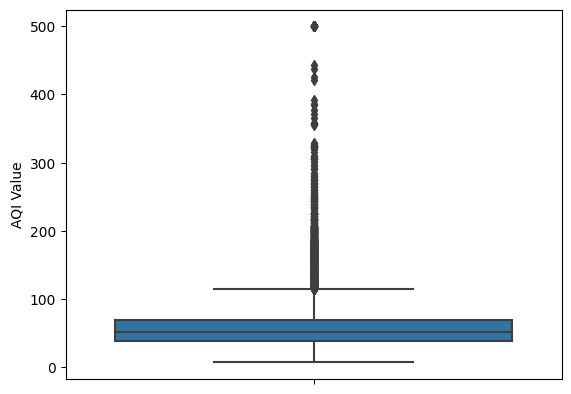

 
column CO AQI Value


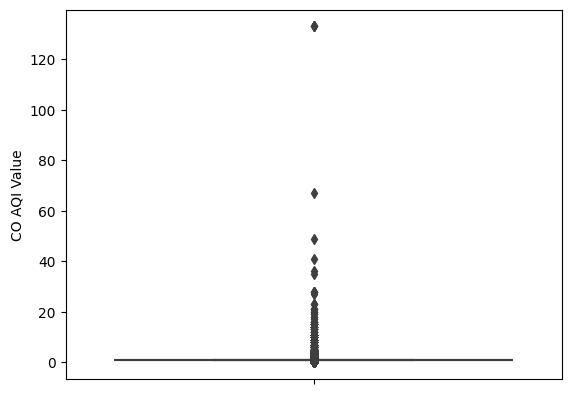

 
column Ozone AQI Value


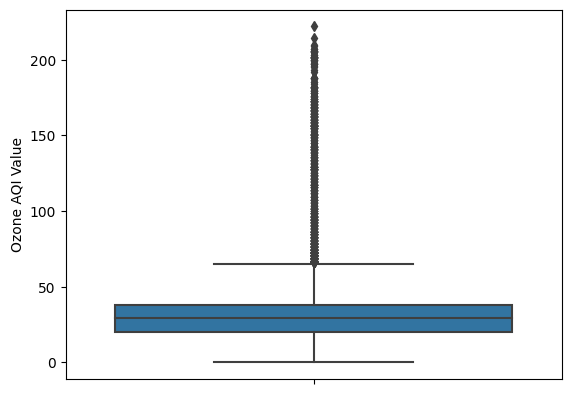

 
column NO2 AQI Value


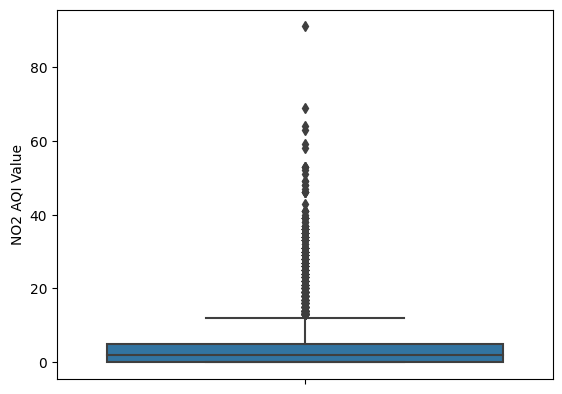

 
column PM2.5 AQI Value


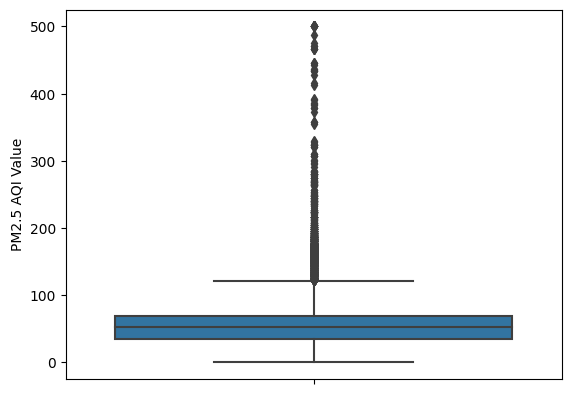

 
column lat


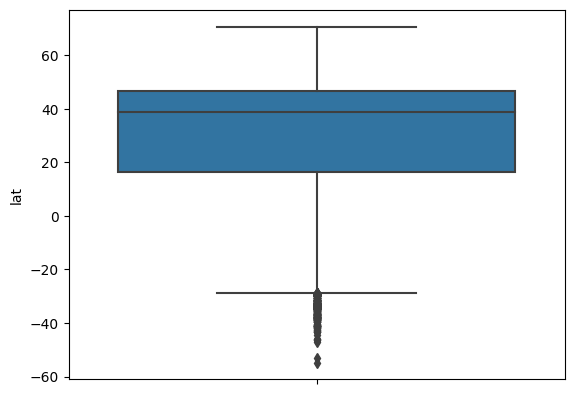

 
column lng


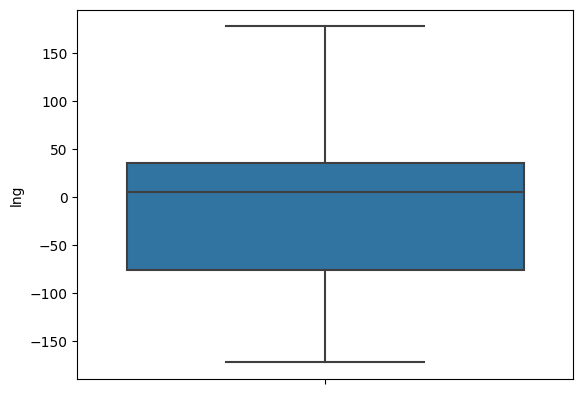

In [ ]:
for j in num_var:
  print('column', j)
  fig1 = sn.boxplot(y= j, data = df)
  plt.show()
  print(' ')

column AQI Value


<ipython-input-138-f671c36f9776>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig2 = sn.distplot(df[j])


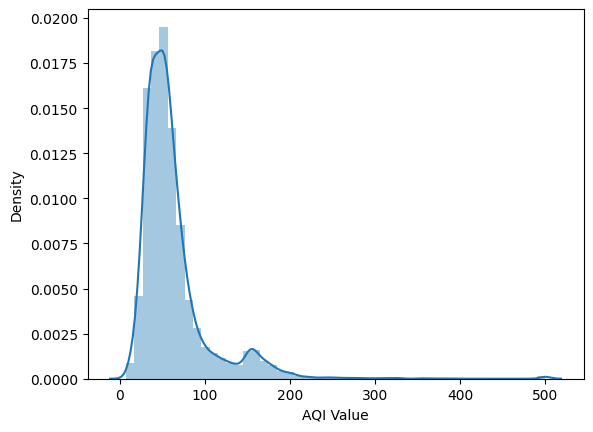


column CO AQI Value


<ipython-input-138-f671c36f9776>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig2 = sn.distplot(df[j])


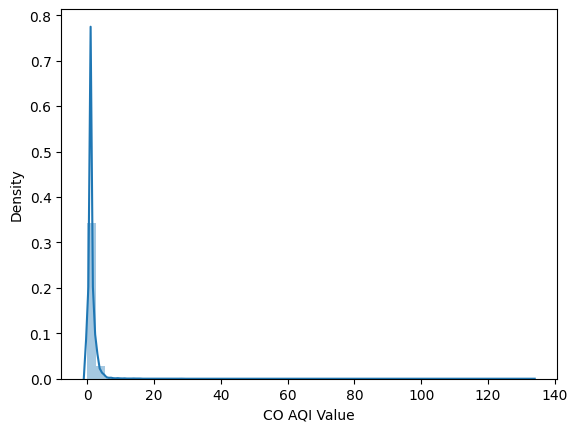


column Ozone AQI Value


<ipython-input-138-f671c36f9776>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig2 = sn.distplot(df[j])


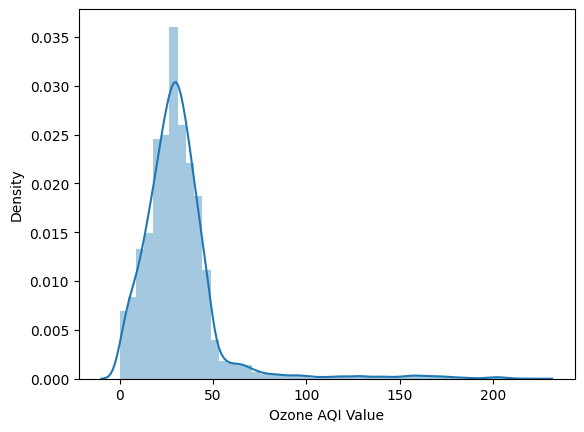


column NO2 AQI Value


<ipython-input-138-f671c36f9776>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig2 = sn.distplot(df[j])


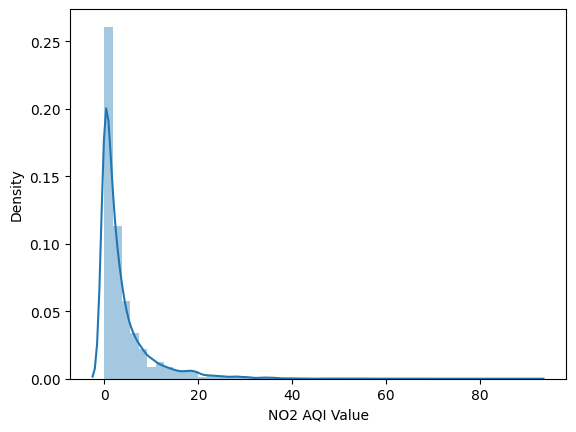


column PM2.5 AQI Value


<ipython-input-138-f671c36f9776>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig2 = sn.distplot(df[j])


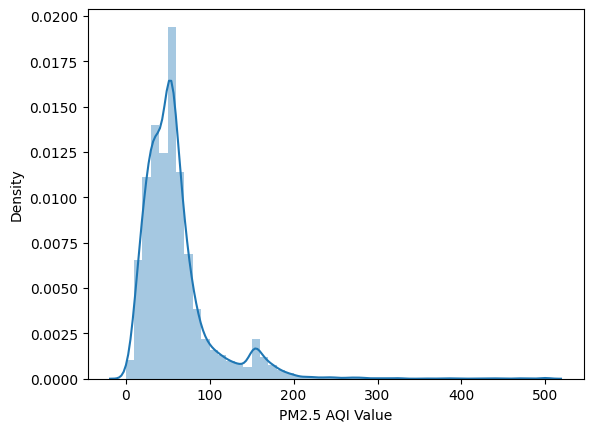


column lat


<ipython-input-138-f671c36f9776>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig2 = sn.distplot(df[j])


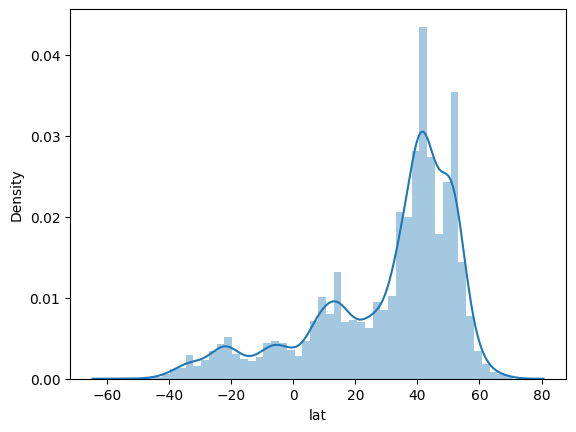


column lng


<ipython-input-138-f671c36f9776>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig2 = sn.distplot(df[j])


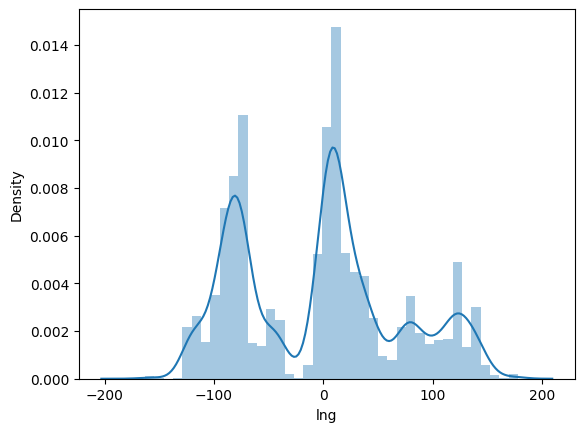

In [ ]:
for j in num_var:
  print('column', j)
  fig2 = sn.distplot(df[j])
  plt.show()
  print('')

In [ ]:
mode_value = df['Country'].mode()[0]

In [ ]:
df['Country'].fillna(mode_value, inplace = True)

In [ ]:
df.isnull().sum()

Country               0
City                  0
AQI Value             0
AQI Category          0
CO AQI Value          0
CO AQI Category       0
Ozone AQI Value       0
Ozone AQI Category    0
NO2 AQI Value         0
NO2 AQI Category      0
PM2.5 AQI Value       0
PM2.5 AQI Category    0
lat                   0
lng                   0
dtype: int64

In [ ]:
df['AQI Category'].unique()

array(['Moderate', 'Good', 'Unhealthy', 'Very Unhealthy',
       'Unhealthy for Sensitive Groups', 'Hazardous'], dtype=object)

In [ ]:
df['CO AQI Category'].unique()

array(['Good', 'Unhealthy for Sensitive Groups', 'Moderate'], dtype=object)

In [ ]:
df['Ozone AQI Category'].unique()

array(['Good', 'Moderate', 'Unhealthy', 'Very Unhealthy',
       'Unhealthy for Sensitive Groups'], dtype=object)

In [ ]:
df['NO2 AQI Category'].unique()

array(['Good', 'Moderate'], dtype=object)

In [ ]:
df['PM2.5 AQI Category'].unique()

array(['Moderate', 'Good', 'Unhealthy', 'Very Unhealthy',
       'Unhealthy for Sensitive Groups', 'Hazardous'], dtype=object)

In [ ]:
df1_num = df.drop(['PM2.5 AQI Category','NO2 AQI Category','Ozone AQI Category','CO AQI Category','AQI Category','lat','lng'],axis = 1)

In [ ]:
df1_num.head()

,Country,City,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
0,Russian Federation,Praskoveya,51,1,36,0,51
1,Brazil,Presidente Dutra,41,1,5,1,41
2,Brazil,Presidente Dutra,41,1,5,1,41
3,Italy,Priolo Gargallo,66,1,39,2,66
4,Poland,Przasnysz,34,1,34,0,20


<ipython-input-149-f11405cedefc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(df1_num.corr(), annot= True, cmap='RdYlGn')


<Axes: >

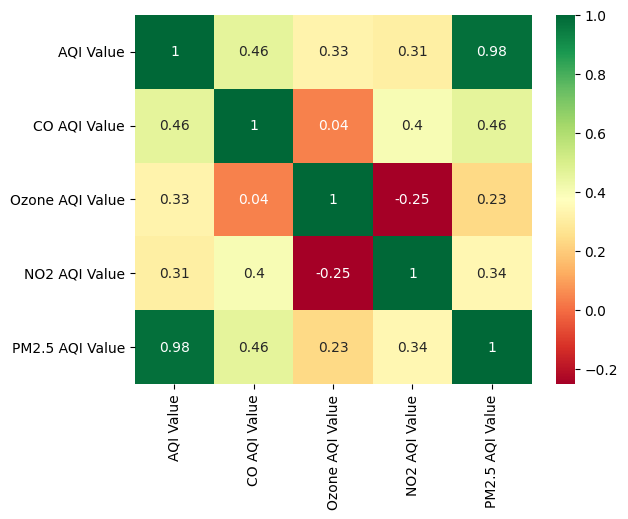

In [ ]:
sn.heatmap(df1_num.corr(), annot= True, cmap='RdYlGn')

In [ ]:
rs = RobustScaler()
ss = StandardScaler()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [ ]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical varibales\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 7 categorical varibales

The categorical variables are :

 ['Country', 'City', 'AQI Category', 'CO AQI Category', 'Ozone AQI Category', 'NO2 AQI Category', 'PM2.5 AQI Category']


In [ ]:
df[categorical]

,Country,City,AQI Category,CO AQI Category,Ozone AQI Category,NO2 AQI Category,PM2.5 AQI Category
0,Russian Federation,Praskoveya,Moderate,Good,Good,Good,Moderate
1,Brazil,Presidente Dutra,Good,Good,Good,Good,Good
2,Brazil,Presidente Dutra,Good,Good,Good,Good,Good
3,Italy,Priolo Gargallo,Moderate,Good,Good,Good,Moderate
4,Poland,Przasnysz,Good,Good,Good,Good,Good
...,...,...,...,...,...,...,...
16690,United States of America,Highland Springs,Moderate,Good,Good,Good,Moderate
16691,Slovakia,Martin,Moderate,Good,Good,Good,Moderate
16692,Slovakia,Martin,Moderate,Good,Good,Good,Moderate
16693,France,Sceaux,Good,Good,Good,Good,Good


In [ ]:
df[categorical] = df[categorical].apply(le.fit_transform)

In [ ]:
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,130,10126,51,2,1,0,36,0,0,0,51,2,44.7444,44.2031
1,22,10140,41,0,1,0,5,0,1,0,41,0,-5.2900,-44.4900
2,22,10140,41,0,1,0,5,0,1,0,41,0,-11.2958,-41.9869
3,75,10163,66,2,1,0,39,0,2,0,66,2,37.1667,15.1833
4,123,10185,34,0,1,0,34,0,0,0,20,0,53.0167,20.8833


In [ ]:
X = df.drop(['AQI Value','lat','lng'],axis = 1)

In [ ]:
X.head()

,Country,City,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,130,10126,2,1,0,36,0,0,0,51,2
1,22,10140,0,1,0,5,0,1,0,41,0
2,22,10140,0,1,0,5,0,1,0,41,0
3,75,10163,2,1,0,39,0,2,0,66,2
4,123,10185,0,1,0,34,0,0,0,20,0


In [ ]:
Y = df['AQI Value']

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size= 0.2, random_state= 42)

In [ ]:
X_train1 = pd.DataFrame(ss.fit_transform(X_train),columns = X_train.columns)

In [ ]:
X_rstrain = pd.DataFrame(rs.fit_transform(X_train),columns = X_train.columns)

In [ ]:
df1_num.head()

,Country,City,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
0,Russian Federation,Praskoveya,51,1,36,0,51
1,Brazil,Presidente Dutra,41,1,5,1,41
2,Brazil,Presidente Dutra,41,1,5,1,41
3,Italy,Priolo Gargallo,66,1,39,2,66
4,Poland,Przasnysz,34,1,34,0,20


In [ ]:
categorical1 = [var for var in df1_num.columns if df1_num[var].dtype=='O']

print('There are {} categorical varibales\n'.format(len(categorical1)))

print('The categorical variables are :\n\n', categorical1)

There are 2 categorical varibales

The categorical variables are :

 ['Country', 'City']


In [ ]:
df1_num[categorical1] = df1_num[categorical1].apply(le.fit_transform)

In [ ]:
df1_num.head()

,Country,City,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
0,130,10126,51,1,36,0,51
1,22,10140,41,1,5,1,41
2,22,10140,41,1,5,1,41
3,75,10163,66,1,39,2,66
4,123,10185,34,1,34,0,20


In [ ]:
X1 = df1_num.drop(['AQI Value'],axis = 1)

Y1 = df1_num['AQI Value']

X1_train,X1_test,Y1_train,Y1_test = train_test_split(X1,Y1, test_size= 0.2, random_state= 42)

In [ ]:
X11_trainss = pd.DataFrame(ss.fit_transform(X1_train),columns = X1_train.columns)

In [ ]:
X11_trainrs = pd.DataFrame(rs.fit_transform(X1_train),columns = X1_train.columns)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
ssmodel1 = lr.fit(X_train1, Y_train)

In [ ]:
y_sspred = lr.predict(X_test)

In [ ]:
rsmodel1 = lr.fit(X_rstrain, Y_train)

In [ ]:
y_rspred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
mse = mean_squared_error(Y_test, y_sspred)

print("Mean Squared Error:", mse)

Mean Squared Error: 15327661.230847424


In [ ]:
mae = mean_absolute_error(Y_test, y_sspred)

print("Mean Absolute Error:", mae)

Mean Absolute Error: 3461.051847463648


In [ ]:
r2ss = r2_score(Y_test, y_sspred)

print("R-squared (R2) Score:", r2)

R-squared (R2) Score: -6304.592276170108


In [ ]:
mse = mean_squared_error(Y_test, y_rspred)

print("Mean Squared Error:", mse)

Mean Squared Error: 15198456.284411818


In [ ]:
mae = mean_absolute_error(Y_test, y_rspred)

print("Mean Absolute Error:", mae)

Mean Absolute Error: 3534.0884642517553


In [ ]:
r2rs = r2_score(Y_test, y_rspred)

print("R-squared (R2) Score:", r2)

R-squared (R2) Score: -6304.592276170108


In [ ]:
ssmodel2 = lr.fit(X11_trainss, Y1_train)

In [ ]:
y_sspred1 = lr.predict(X1_test)

In [ ]:
mse = mean_squared_error(Y1_test, y_sspred1)

print("Mean Squared Error:", mse)

Mean Squared Error: 17921443.22186254


In [ ]:
mae = mean_absolute_error(Y1_test, y_sspred1)

print("Mean Absolute Error:", mae)

Mean Absolute Error: 3807.359962846124


In [ ]:
r2ss1 = r2_score(Y1_test, y_sspred1)

print("R-squared (R2) Score:", r2)

R-squared (R2) Score: -6304.592276170108
